## Train the ML models for the Scikit-Explain package. 

In [8]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import joblib
from os.path import join, dirname
import os
import pathlib

In [5]:
import plotting_config


In [10]:
base_path = pathlib.Path(os.environ['HOME']) / 'prog' / 'scikit-explain'

In [18]:
output_path = pathlib.Path(os.environ['HOME'])  / 'prog' / 'ml_benchmarks'

In [11]:
#Import the training dataset
filename = base_path / 'skexplain' / 'common' / 'data' / 'road_surface_data.csv'

# Load the examples the models were trained on.
TARGET_COLUMN = 'cat_rt'
data  = pd.read_csv(filename)

examples = data[plotting_config.cols_to_use]
targets = data[TARGET_COLUMN].values

In [47]:
examples

,dllwave_flux,dwpt2m,fric_vel,gflux,high_cloud,lat_hf,low_cloud,mid_cloud,sat_irbt,sens_hf,...,vbd_flux,vdd_flux,wind10m,date_marker,urban,rural,d_ground,d_rad_d,d_rad_u,hrrr_dT
0,211.0,-2.504,0.28,44.0,0.000,-10.0,8.875,0.00,-9.50,-21.0,...,8.875,8.875,3.654,48.0,0.0,1.0,65.0,-211.0,-302.8,0.9624
1,241.2,-4.168,0.36,-10.0,0.000,70.0,13.125,0.00,-3.00,85.0,...,13.125,13.125,2.324,31.0,1.0,0.0,-95.0,358.8,293.8,-2.7770
2,242.0,-2.172,0.31,43.0,0.000,25.0,0.000,0.00,-0.75,-50.0,...,0.000,0.000,4.110,19.0,0.0,1.0,93.0,-242.0,-316.5,1.6900
3,220.4,-3.291,0.62,75.0,0.000,30.0,0.000,0.00,-3.00,-30.0,...,0.000,0.000,3.480,50.0,1.0,0.0,105.0,-220.4,-313.5,0.9844
4,212.9,-5.020,0.15,50.0,0.000,0.0,0.000,0.00,-7.25,-20.0,...,0.000,0.000,3.438,16.0,0.0,1.0,70.0,-212.9,-274.8,1.9300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,264.2,-5.895,0.02,39.0,15.625,0.0,0.000,80.75,-32.62,-2.0,...,0.000,0.000,3.174,58.0,0.0,1.0,41.0,-264.2,-311.2,4.7270
99996,191.6,-10.664,0.39,29.0,0.000,0.0,4.125,0.00,-12.75,-50.0,...,4.125,4.125,3.070,65.0,0.0,1.0,79.0,-191.6,-275.0,1.6540
99997,296.8,1.303,0.36,33.0,0.000,13.0,33.120,0.00,-19.12,-6.0,...,33.120,33.120,3.236,43.0,1.0,0.0,39.0,-296.8,-328.2,0.2673
99998,257.0,0.782,0.11,40.0,0.250,5.0,10.000,77.75,-36.00,-3.0,...,10.000,10.000,1.037,29.0,1.0,0.0,43.0,-241.1,-312.8,0.3572


In [54]:
import numpy

In [57]:
[(i1,numpy.count_nonzero(targets == i1)) for i1 in numpy.unique(targets)]

[(0.0, 60827), (1.0, 39173)]

Fit the models 


In [22]:
%%time
rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=5, n_jobs=5)
gbf = GradientBoostingClassifier()
lr = LogisticRegression(C=1)
model_set = [rf, gbf, lr]

model_out_dir = output_path / 'models'
if not model_out_dir.is_dir():
    model_out_dir.mkdir()
print(model_out_dir)

estimators = []
for clf in model_set:
    clf.fit(examples, targets)
    model_name = f'{type(clf).__name__}.pkl'
    model_out_path = model_out_dir / model_name
    print(model_out_path)
    joblib.dump(clf, model_out_path, compress=4)
    estimators += [(model_name, clf)]


/Users/stephen.haddad/prog/ml_benchmarks/models
/Users/stephen.haddad/prog/ml_benchmarks/models/RandomForestClassifier.pkl
/Users/stephen.haddad/prog/ml_benchmarks/models/GradientBoostingClassifier.pkl
/Users/stephen.haddad/prog/ml_benchmarks/models/LogisticRegression.pkl
CPU times: user 2min 2s, sys: 1.27 s, total: 2min 3s
Wall time: 1min 3s


/Users/stephen.haddad/opt/anaconda3/envs/pip-skexplain/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
estimators = []
for model_name in ['LogisticRegression','RandomForestClassifier','GradientBoostingClassifier']:
    model_out_path = model_out_dir / (model_name + '.pkl')
    print(model_out_path)
    clf = joblib.load(model_out_path)
    estimators += [(model_name, clf)]


/Users/stephen.haddad/prog/ml_benchmarks/models/LogisticRegression.pkl
/Users/stephen.haddad/prog/ml_benchmarks/models/RandomForestClassifier.pkl
/Users/stephen.haddad/prog/ml_benchmarks/models/GradientBoostingClassifier.pkl


In [23]:
import skexplain

In [33]:
explainer1 = skexplain.ExplainToolkit(estimators=estimators,
                         X=examples,
                         y=targets,
                        )

In [34]:
explainer1

ExplainToolkit(estimator=OrderedDict([('LogisticRegression', LogisticRegression(C=1)), ('RandomForestClassifier', RandomForestClassifier(min_samples_leaf=5, n_estimators=200, n_jobs=5)), ('GradientBoostingClassifier', GradientBoostingClassifier())]) 
                                  estimator_names=['LogisticRegression', 'RandomForestClassifier', 'GradientBoostingClassifier'] 
                                  X=<class 'pandas.core.frame.DataFrame'> length:100000 
                                  y=<class 'numpy.ndarray'> length:100000 
                                  estimator_output=probability 
                                  feature_names=<class 'list'> length 30)

In [35]:
pi_res = explainer1.permutation_importance(n_vars=5,evaluation_fn='auc')

Perm. Imp.: 100%|█████████████████████████████████| 5/5 [00:38<00:00,  7.78s/it]


In [45]:
pi_res

<xarray.Dataset>
Dimensions:                                                   (
                                                               n_vars_multipass: 5,
                                                               n_permute: 1,
                                                               n_vars_singlepass: 30)
Dimensions without coordinates: n_vars_multipass, n_permute, n_vars_singlepass
Data variables: (12/15)
    backward_multipass_rankings__LogisticRegression           (n_vars_multipass) <U11 ...
    backward_multipass_scores__LogisticRegression             (n_vars_multipass, n_permute) float64 ...
    backward_singlepass_rankings__LogisticRegression          (n_vars_singlepass) <U17 ...
    backward_singlepass_scores__LogisticRegression            (n_vars_singlepass, n_permute) float64 ...
    original_score__LogisticRegression                        (n_permute) float64 ...
    backward_multipass_rankings__RandomForestClassifier       (n_vars_multipass) <U17 ...
    ...                                                        ...
    original_score__RandomForestClassifier                    (n_permute) float64 ...
    backward_multipass_rankings__GradientBoostingClassifier   (n_vars_multipass) <U17 ...
    backward_multipass_scores__GradientBoostingClassifier     (n_vars_multipass, n_permute) float64 ...
    backward_singlepass_rankings__GradientBoostingClassifier  (n_vars_singlepass) <U17 ...
    backward_singlepass_scores__GradientBoostingClassifier    (n_vars_singlepass, n_permute) float64 ...
    original_score__GradientBoostingClassifier                (n_permute) float64 ...
Attributes:
    estimator_output:  probability
    estimators used:   ['LogisticRegression', 'RandomForestClassifier', 'Grad...
    n_multipass_vars:  5
    method:            permutation_importance
    direction:         backward
    evaluation_fn:     auc

In [59]:
estimators

[('LogisticRegression', LogisticRegression(C=1)),
 ('RandomForestClassifier',
  RandomForestClassifier(min_samples_leaf=5, n_estimators=200, n_jobs=5)),
 ('GradientBoostingClassifier', GradientBoostingClassifier())]

In [62]:
panels_to_plot = [('backward_singlepass', e1[0]) for e1 in estimators]
panels_to_plot

[('backward_singlepass', 'LogisticRegression'),
 ('backward_singlepass', 'RandomForestClassifier'),
 ('backward_singlepass', 'GradientBoostingClassifier')]

(<Figure size 1800x750 with 5 Axes>,
 array([<Axes: title={'center': 'LogisticRegression'}>,
        <Axes: title={'center': 'RandomForestClassifier'}>,
        <Axes: title={'center': 'GradientBoostingClassifier'}>],
       dtype=object))

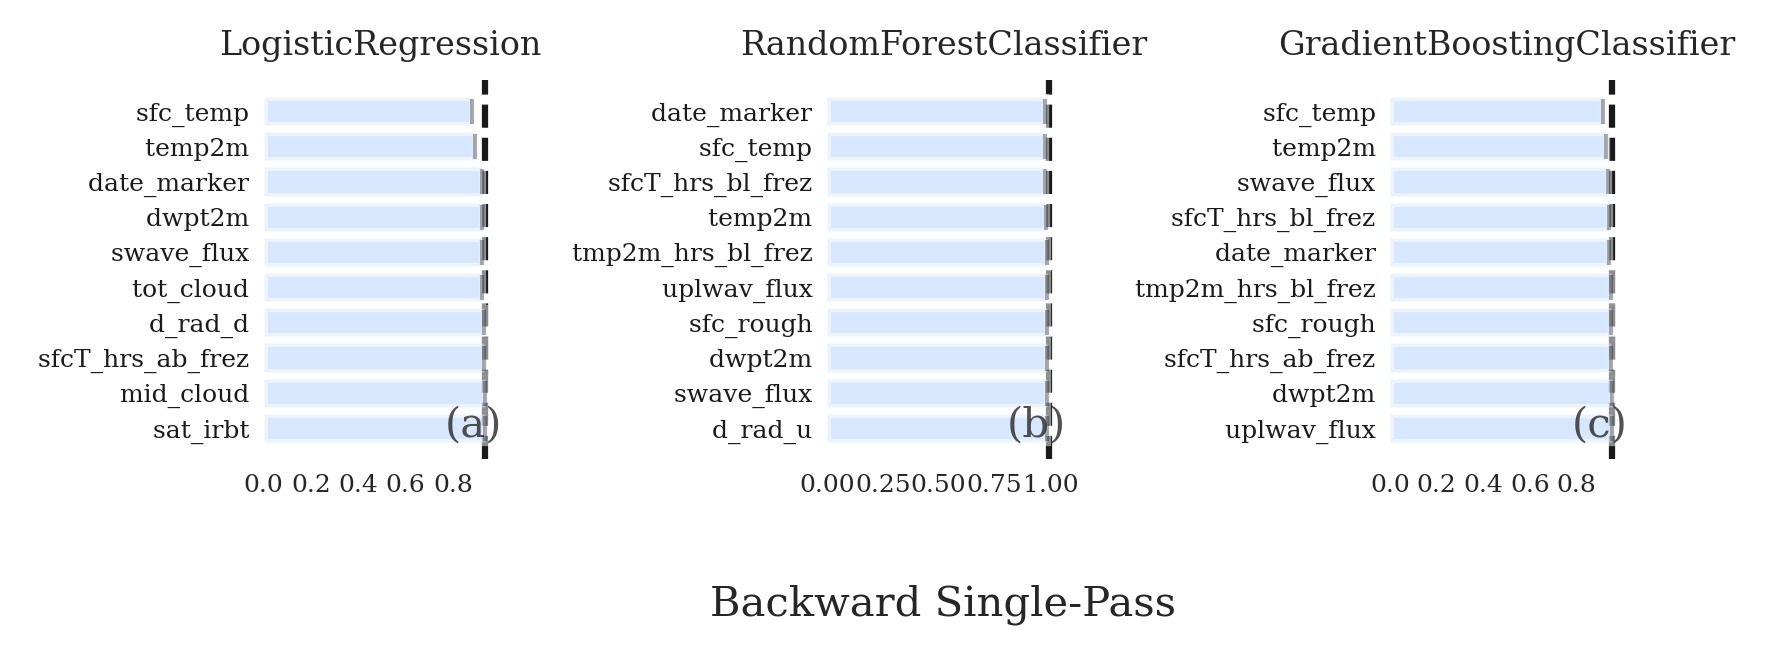

In [63]:
explainer1.plot_importance(data=pi_res,
                           panels=panels_to_plot)

In [67]:
# Assumes the .permutation_importance has already been run.
important_vars = explainer1.get_important_vars(pi_res, multipass=True, n_vars=7)


In [68]:
important_vars

{'LogisticRegression': ['sfc_temp',
  'temp2m',
  'dwpt2m',
  'date_marker',
  'swave_flux'],
 'RandomForestClassifier': ['date_marker',
  'sfc_temp',
  'temp2m',
  'sfcT_hrs_bl_frez',
  'tmp2m_hrs_bl_frez'],
 'GradientBoostingClassifier': ['sfc_temp',
  'temp2m',
  'sfcT_hrs_bl_frez',
  'date_marker',
  'tmp2m_hrs_bl_frez']}

In [69]:
ale = explainer1.ale(features=important_vars, n_bins=20)
ale

KeyError: 0